<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/CNN_Filters_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
#@title Import Libraries
%matplotlib inline
# load and show an image with Pillow
from PIL import Image
# load the image
from IPython.display import display # to display images
from matplotlib import pyplot as plt # to display images
from matplotlib.pyplot import figure
import numpy as np


In [247]:
#@title Reminder1: Matrix Multiplication Types 
x1 = np.arange(1,5).reshape((2, 2))
x2 = np.arange(5,9).reshape((2, 2))
display('x1',x1)
display('x2',x2)
#Matrix Multiplication
print('Matrix Multiplication (np.matmul) result:\n',np.matmul(x1, x2))

#Element-Wise Matrix Multiplication
print('Element-Wise Matrix Multiplication (np.multiply) result:\n',np.multiply(x1, x2))

#Element-Wise Matrix Multiplication
print('Element-Wise Matrix Multiplication (*) result:\n',x1 * x2)

'x1'

array([[1, 2],
       [3, 4]])

'x2'

array([[5, 6],
       [7, 8]])

Matrix Multiplication (np.matmul) result:
 [[19 22]
 [43 50]]
Element-Wise Matrix Multiplication (np.multiply) result:
 [[ 5 12]
 [21 32]]
Element-Wise Matrix Multiplication (*) result:
 [[ 5 12]
 [21 32]]


In [248]:
#@title Reminder2: Padding with Zero 
print('Original Matrix\n',x1)
padded = np.zeros(shape=(x1.shape[0]+2,x1.shape[0]+2))
padded[1:3,1:3]=x1
print('Padded Matrix\n',padded)

Original Matrix
 [[1 2]
 [3 4]]
Padded Matrix
 [[0. 0. 0. 0.]
 [0. 1. 2. 0.]
 [0. 3. 4. 0.]
 [0. 0. 0. 0.]]


#Prepare Dataset
* Prepare images with different shapes in 2 different resolutions: **8x8** and **64x64**
* You can use MS Paint **Resize** function


In [249]:
#@title Load Image
fileName = "+8.png" #@param {type:"string"}
image = Image.open(fileName)
# summarize some details about the image
print('image.format: ', image.format)
print('image mode: ', image.mode)
print('Image size: ',image.size)
imageMatrix=np.array(image)
print('Image shape:', imageMatrix.shape)
# show the image
display(image)

image.format:  PNG
image mode:  RGB
Image size:  (8, 8)
Image shape: (8, 8, 3)


# Convert image to a 3D matrix

In [250]:
imageMatrix=np.array(image)

# Print the matrix shape (dimensions)
* The image format is **RGB** which means that each point in the image has three values \
determining the **Red**, **Green** and **Blue** color depths.
* Even image size is **NxN**, the image matrix has the shape **NxNx3** or **3xNxN**
* The last (or first) dimension (3) indicates that for each point NxN has \
3 distinct values corresponding to RGB depths.
  

In [251]:
print(imageMatrix.shape)

(8, 8, 3)


# Transpose the matrix such that color channels-first as 3xNxN matrix

In [252]:
imageMatrix = np.transpose(imageMatrix, (2,0,1))
imageMatrix.shape

(3, 8, 8)

Let's see the values for each color channel

In [253]:
imageMatrix

array([[[255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 147, 192, 255, 255, 255],
        [187, 187, 196, 104, 137, 193, 187, 187],
        [143, 143, 150,  79, 104, 148, 143, 143],
        [255, 255, 255, 150, 195, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255]],

       [[255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 147, 192, 255, 255, 255],
        [187, 187, 196, 104, 137, 193, 187, 187],
        [143, 143, 150,  79, 104, 148, 143, 143],
        [255, 255, 255, 150, 195, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255]],

       [[255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 143, 187, 255, 255, 255],
        [255, 255, 255, 147, 192, 255, 255, 255],
        [187, 187, 196, 104, 137, 193, 187, 18

# Drop color channels: 
* For the sake of simplicity, we will use only the **RED** (**first**) channel values for each NxN pixel in the image

In [254]:
imageMatrix=imageMatrix[0,:,:]
print(imageMatrix.shape)

(8, 8)


# Print the matrix content

In [255]:
imageMatrix

array([[255, 255, 255, 143, 187, 255, 255, 255],
       [255, 255, 255, 143, 187, 255, 255, 255],
       [255, 255, 255, 147, 192, 255, 255, 255],
       [187, 187, 196, 104, 137, 193, 187, 187],
       [143, 143, 150,  79, 104, 148, 143, 143],
       [255, 255, 255, 150, 195, 255, 255, 255],
       [255, 255, 255, 143, 187, 255, 255, 255],
       [255, 255, 255, 143, 187, 255, 255, 255]], dtype=uint8)

# Inverse the color values
* In the above image matrix; White is 255 BLACK is 0,
* We are looking for black lines
*Thus, let's convert to WHITE to 0 and BLACK to 255 

In [256]:
imageMatrix=  255- imageMatrix 
imageMatrix

array([[  0,   0,   0, 112,  68,   0,   0,   0],
       [  0,   0,   0, 112,  68,   0,   0,   0],
       [  0,   0,   0, 108,  63,   0,   0,   0],
       [ 68,  68,  59, 151, 118,  62,  68,  68],
       [112, 112, 105, 176, 151, 107, 112, 112],
       [  0,   0,   0, 105,  60,   0,   0,   0],
       [  0,   0,   0, 112,  68,   0,   0,   0],
       [  0,   0,   0, 112,  68,   0,   0,   0]], dtype=uint8)

# Normalize the matrix values between 0 & 1
* In RGB format values are between 0 and 255
* In ML, we prefer values between 0 and 1
* Thus, we will matrix division by a scalar 

In [257]:
imageMatrix=imageMatrix/255
imageMatrix

array([[0.        , 0.        , 0.        , 0.43921569, 0.26666667,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.43921569, 0.26666667,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.42352941, 0.24705882,
        0.        , 0.        , 0.        ],
       [0.26666667, 0.26666667, 0.23137255, 0.59215686, 0.4627451 ,
        0.24313725, 0.26666667, 0.26666667],
       [0.43921569, 0.43921569, 0.41176471, 0.69019608, 0.59215686,
        0.41960784, 0.43921569, 0.43921569],
       [0.        , 0.        , 0.        , 0.41176471, 0.23529412,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.43921569, 0.26666667,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.43921569, 0.26666667,
        0.        , 0.        , 0.        ]])

# Check the min, max and mean values in the matrix

In [258]:
print(imageMatrix.min(),imageMatrix.max(), imageMatrix.mean())

0.0 0.6901960784313725 0.16574754901960784


# CREATE A FILTER for + 
* We want to know if there is  **+** in the given image
* Therefore, we will create a "**filter**" which will let **+** pass through this "filter" and ***stop*** other shape values
* IMPORTANT: In Convolutional Nueral Networks (**CNN**) the filters (i.e. the numbers in the filters: ***weights***) are \
found at the end of the network **training** **automatically**! 

* Here, for the sake of simplicity, we will assign weights **manually**. 


## Create + filter (**kernel size**=8x8) by setting up a new matrix
* Notice that the possible location of "+" is centered and **weihgts** are assigned with **1 **values
* Out of the "+" shape loacations, the weights are initialized with **-1** not **Zero**. **Why?**

In [259]:
plusFilter=np.array([[-1,-1,-1,1,1,-1,-1,-1],
                     [-1,-1,-1,1,1,-1,-1,-1],
                     [-1,-1,-1,1,1,-1,-1,-1],
                     [ 1, 1, 1,1,1, 1, 1, 1],
                     [ 1, 1, 1,1,1, 1, 1, 1],
                     [-1,-1,-1,1,1,-1,-1,-1],
                     [-1,-1,-1,1,1,-1,-1,-1],
                     [-1,-1,-1,1,1,-1,-1,-1]
                     ])

plusFilter.shape

(8, 8)

In [260]:
plusFilter

array([[-1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1,  1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1],
       [-1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1,  1, -1, -1, -1]])

# Show the filter as image

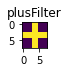

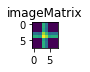

In [261]:
#@title 
figure(figsize=(plusFilter.shape[0]/8, plusFilter.shape[0]/8))
plt.subplot(1, 2, 1)
plt.imshow(plusFilter, interpolation='nearest')
plt.title('plusFilter')

figure(figsize=(imageMatrix.shape[0]/8, imageMatrix.shape[0]/8))
plt.subplot(1, 2, 2)
plt.title('imageMatrix')
plt.imshow(imageMatrix, interpolation='nearest')
plt.show()

## **CONVOLUTION**: Apply "+" filter to the image by Element wise Matrix Multiplication

* Result is called a "**feature map**"



In [262]:
#featureMap= np.matmul(imageMatrix,plusFilter)
featureMap= (imageMatrix*plusFilter)

In [263]:
#@title Feature Map shape and weights
print('Feature Map shape ',featureMap.shape)
print('Feature Map weights: \n')
print(featureMap)

Feature Map shape  (8, 8)
Feature Map weights: 

[[-0.         -0.         -0.          0.43921569  0.26666667 -0.
  -0.         -0.        ]
 [-0.         -0.         -0.          0.43921569  0.26666667 -0.
  -0.         -0.        ]
 [-0.         -0.         -0.          0.42352941  0.24705882 -0.
  -0.         -0.        ]
 [ 0.26666667  0.26666667  0.23137255  0.59215686  0.4627451   0.24313725
   0.26666667  0.26666667]
 [ 0.43921569  0.43921569  0.41176471  0.69019608  0.59215686  0.41960784
   0.43921569  0.43921569]
 [-0.         -0.         -0.          0.41176471  0.23529412 -0.
  -0.         -0.        ]
 [-0.         -0.         -0.          0.43921569  0.26666667 -0.
  -0.         -0.        ]
 [-0.         -0.         -0.          0.43921569  0.26666667 -0.
  -0.         -0.        ]]


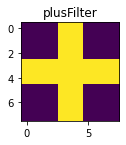

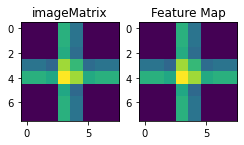

In [264]:
#@title Show Feature Map as image

plt.subplot(1, 3, 1)
plt.imshow(plusFilter, interpolation='nearest')
plt.title('plusFilter')
plt.show()


plt.subplot(1, 3, 2)
plt.title('imageMatrix')
plt.imshow(imageMatrix, interpolation='nearest')



plt.subplot(1, 3, 3)
plt.imshow(featureMap, interpolation='nearest')
plt.title('Feature Map')
plt.show()

## Find Confidence of prediction
* Use **Feature Map** to calculate a ***metric*** as an **indication** \
of filter shape ***exist*** in the given image matrix

### Sum the positive and negative values in the Feature Map

In [265]:
totalPos= featureMap[featureMap>0].sum()
totalNeg= featureMap[featureMap<0].sum()

print(totalPos,totalNeg)

10.607843137254903 0.0


### Measure a ***confidence*** 

In [266]:
confidence= totalPos/(totalPos-totalNeg)*100
if confidence <50:
  print('Image does NOT include a + (confidence:{0:.2f}% )'.format(100-confidence))
else:
  print('Image DOES  include a + (confidence:{0:.2f}% )'.format(confidence))

Image DOES  include a + (confidence:100.00% )


#IMAGE WITH A LARGER SIZE

image.format:  PNG
image mode:  RGB
Image size:  (64, 64)
Image shape:  (64, 64, 3)


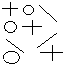

In [267]:
#@title Load Image
fileName = "mix64.png" #@param {type:"string"}
image = Image.open(fileName)
# summarize some details about the image
print('image.format: ', image.format)
print('image mode: ', image.mode)
print('Image size: ',image.size)
imageMatrix=np.array(image)
print('Image shape: ', imageMatrix.shape)
# show the image
display(image)

In [268]:
imageMatrix=np.array(image)
imageMatrix=np.float32(imageMatrix/255)
imageMatrix=1-imageMatrix
imageMatrix=imageMatrix[:,:,0]
print('Image Matrix shape: ', imageMatrix.shape)
print('Filter shape: ', plusFilter.shape)

Image Matrix shape:  (64, 64)
Filter shape:  (8, 8)


Text(0.5, 1.0, 'plusFilter')

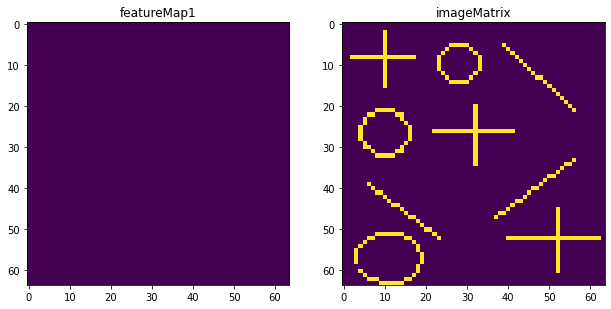

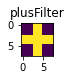

In [269]:
#@title Show: initial featureMap, filter and image
featureMap1 =  np.zeros(shape=(64,64))
featureMap2=  np.zeros(shape=(57,57))

figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(featureMap1, interpolation='nearest')
plt.title('featureMap1')
plt.subplot(1, 3, 2)
plt.imshow(imageMatrix, interpolation='nearest')
plt.title('imageMatrix')

figure(figsize=(2, 2))
plt.subplot(1, 3, 2)
plt.imshow(plusFilter, interpolation='nearest')
plt.title('plusFilter')



In [270]:
for row in range(int(imageMatrix.shape[0]-plusFilter.shape[0])):
  for col in range(int(imageMatrix.shape[0]-plusFilter.shape[0])):
    imagePart=imageMatrix[row:row+8,col:col+8]
    convolution= (imagePart*plusFilter)
    totalPos= convolution[convolution>0].sum()
    if totalPos>14:
      featureMap1[row:row+8,col:col+8]=featureMap1[row:row+8,col:col+8]+convolution

    featureMap2[row,col]=convolution.sum()

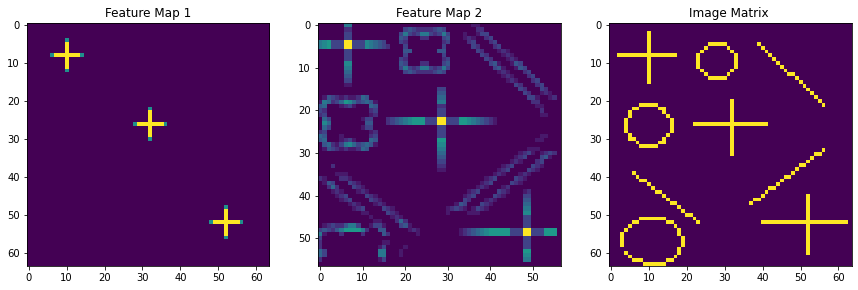

In [271]:
#@title Show Feature Maps as images

figure(figsize=(20, 20))
plt.subplot(1, 4, 2)
plt.title('Feature Map 1') 
featureMap1[featureMap1<0]=0  
plt.imshow(featureMap1, interpolation='nearest')
plt.subplot(1, 4, 3)
plt.title('Feature Map 2') 
featureMap2[featureMap2<0]=0 
plt.imshow(featureMap2, interpolation='nearest')
plt.subplot(1, 4, 4)
plt.title('Image Matrix ')  
plt.imshow(imageMatrix, interpolation='nearest')
plt.show()

In [272]:
selectedFeatureMap = featureMap1
totalPos= selectedFeatureMap[selectedFeatureMap>0].sum()
totalNeg= selectedFeatureMap[selectedFeatureMap<0].sum()

print(totalPos,totalNeg)

180.0 0.0


In [273]:
confidence= totalPos/(totalPos-totalNeg)*100
if confidence <50:
  print('According to the Selected Feature Map; Image does NOT include a + \
    (confidence:{0:.2f}% )'.format(100-confidence))
else:
  print('According to the Selected Feature Map; Image DOES  include a + \
    (confidence:{0:.2f}% )'.format(confidence))

According to the Selected Feature Map; Image DOES  include a +     (confidence:100.00% )


#[Keras Conv2D Layer](https://keras.io/api/layers/convolution_layers/convolution2d/)


## Load image

image.format:  PNG
image mode:  RGB
Image size:  (64, 64)
Image shape:  (64, 64, 3)


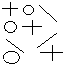

In [274]:
#@title Load Image
fileName = "mix64.png" #@param {type:"string"}
image = Image.open(fileName)
# summarize some details about the image
print('image.format: ', image.format)
print('image mode: ', image.mode)
print('Image size: ',image.size)
imageMatrix=np.array(image)
print('Image shape: ', imageMatrix.shape)
# show the image
display(image)

## Set up parameters

In [281]:
inputShape = (imageMatrix.shape[0],imageMatrix.shape[1])
kernelSize= plusFilter.shape
filters=10

## Pre-process image

In [282]:
imageMatrix=np.float32(imageMatrix/255)
imageMatrix=1-imageMatrix
imageMatrix = imageMatrix.reshape(1,64,64,3)
imageMatrix.shape

(1, 64, 64, 3)

## Convert 2D filter into 3D by replicating the filter

In [283]:
filterWeights = np.zeros(shape=(3,8,8))
filterWeights[0] =plusFilter
filterWeights[1] =plusFilter
filterWeights[2] =plusFilter
filterWeights=filterWeights.transpose(1,2,0).reshape(8,8,3,1)
filterWeights.shape

(8, 8, 3, 1)

## Create N number of filters by replicating the filter

In [284]:
filterWeights=np.repeat(filterWeights,filters)
filterWeights=filterWeights.reshape(8,8,3,filters)
filterWeights.shape

(8, 8, 3, 10)

In [287]:
from tensorflow.keras.layers import Conv2D
# The inputs are 28x28 RGB images with `channels_last` and the batch  size is 4.  
input_shape = (1, 64, 64, 3)
featureMap3 = Conv2D(filters,kernelSize, input_shape=inputShape, use_bias=False,
                     activation='relu', weights=[filterWeights],  padding='valid', 
                     strides=(1,1))(imageMatrix)
print('Feature Map shape: ', featureMap3.shape)


Feature Map shape:  (1, 57, 57, 10)


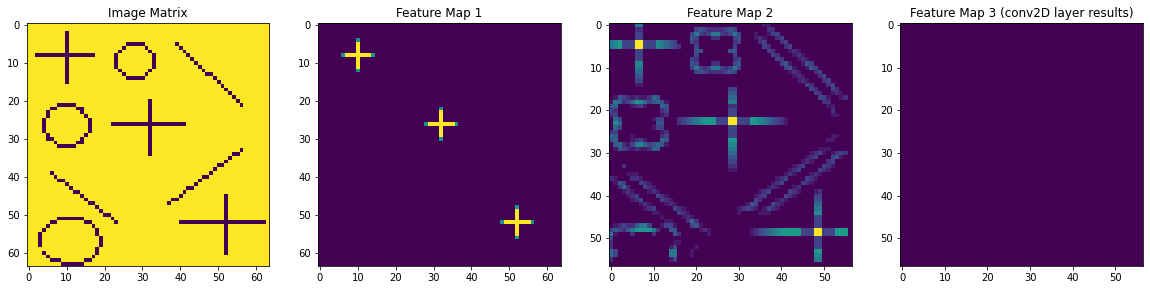

In [286]:
#@title Show image matrix and all feature maps

figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.title('Image Matrix')  
image=imageMatrix.reshape(64,64,3).transpose(2,0,1)[0,:,:]
plt.imshow(image, interpolation='nearest')
plt.subplot(1, 4, 2)
plt.title('Feature Map 1') 
featureMap1[featureMap1<0]=0  
plt.imshow(featureMap1, interpolation='nearest')
plt.subplot(1, 4, 3)
plt.title('Feature Map 2') 
featureMap2[featureMap2<0]=0 
plt.imshow(featureMap2, interpolation='nearest')
plt.subplot(1, 4, 4)
plt.imshow(np.array(featureMap3[:,:,:,0]).reshape(featureMap3.shape[1],featureMap3.shape[2]), interpolation='nearest')
plt.title('Feature Map 3 (conv2D layer results)')
plt.show()

# DO IT YOURSELF:
* Create a **circle** filter & convolve it with test images
* Change the given code such that **padding** and **strides** can be inputted



# NEXT: 
* CONVOLUTION WITH POOLING
* CNN ARCHITECTURE 